In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt


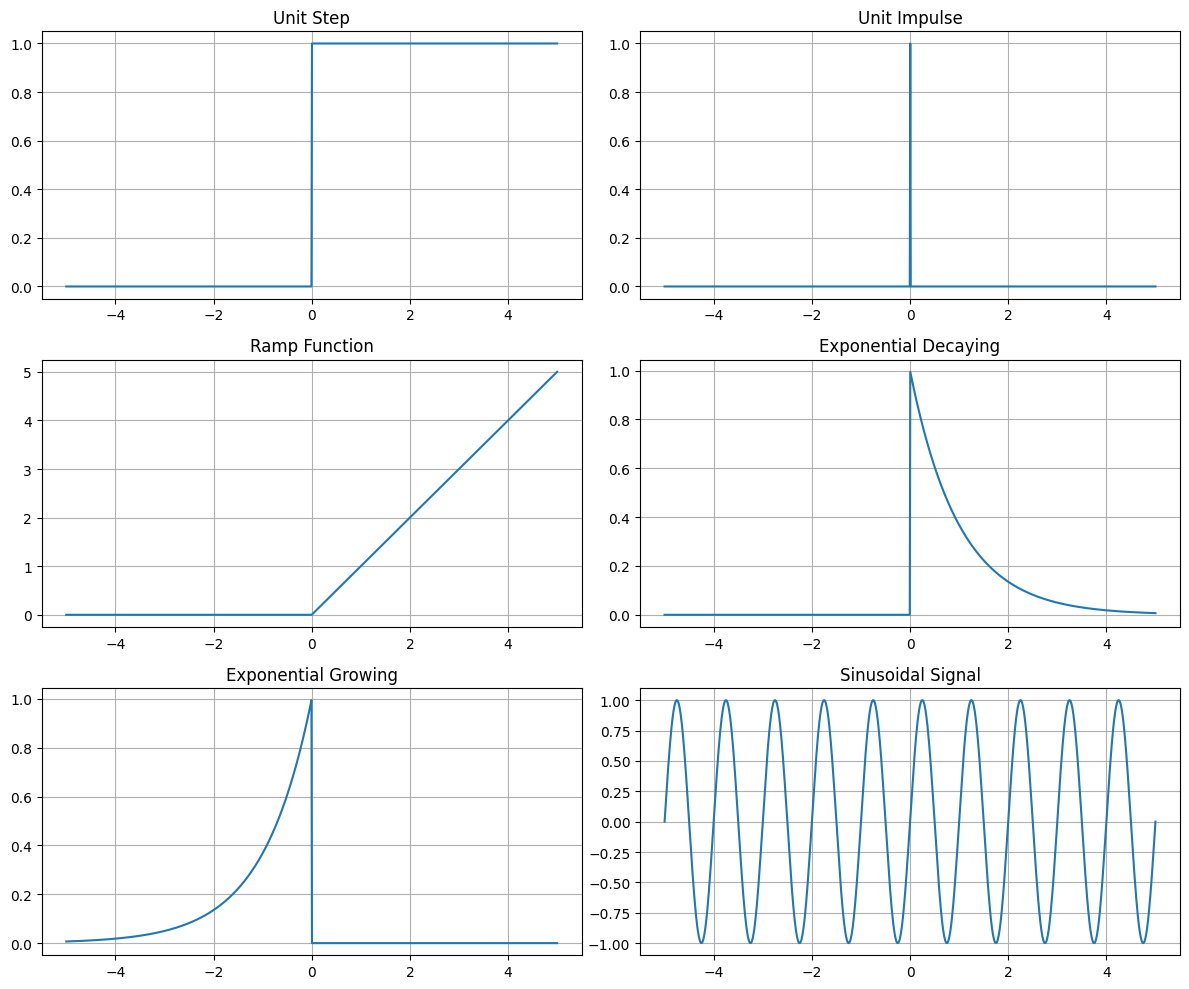

In [4]:
# Common time range
t = np.linspace(-5, 5, 1000)

# (a) Unit step function
u = np.heaviside(t, 1)

# (b) Unit impulse function
impulse = np.zeros_like(t)
impulse[len(t)//2] = 1  # delta at center

# (c) Ramp function
ramp = np.maximum(t, 0)

# (d) Exponential signals
exp_decaying = np.exp(-t) * (t >= 0)
exp_growing = np.exp(t) * (t <= 0)

# (e) Sinusoidal signal
sin_wave = np.sin(2 * np.pi * 1 * t)

# Plotting
plt.figure(figsize=(12,10))

signals = [(u, 'Unit Step'),
           (impulse, 'Unit Impulse'),
           (ramp, 'Ramp Function'),
           (exp_decaying, 'Exponential Decaying'),
           (exp_growing, 'Exponential Growing'),
           (sin_wave, 'Sinusoidal Signal')]

for i, (sig, title) in enumerate(signals, 1):
    plt.subplot(3, 2, i)
    plt.plot(t, sig)
    plt.title(title)
    plt.grid(True)
plt.tight_layout()
plt.show()


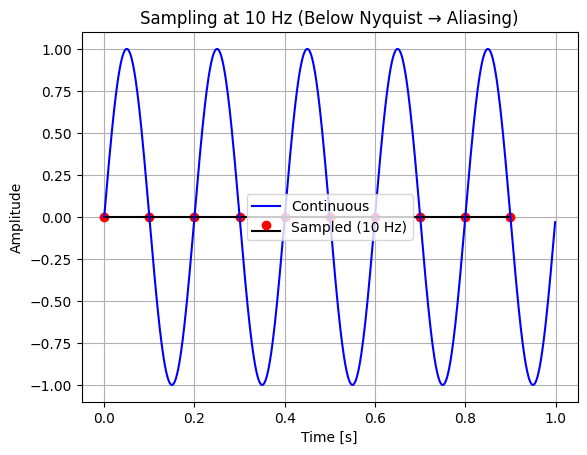

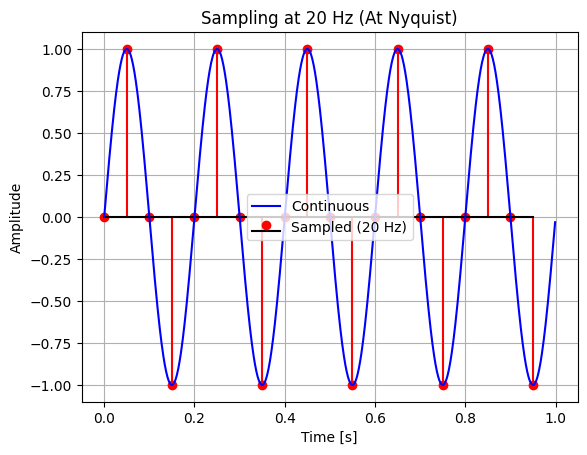

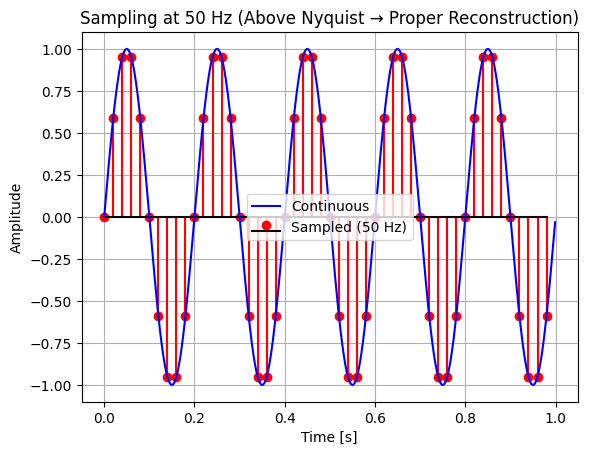

In [5]:
# Continuous signal
fs_cont = 1000  # Continuous-time sampling (for plotting)
t_cont = np.arange(0, 1, 1/fs_cont)
f = 5  # Frequency of sinusoid
x_cont = np.sin(2 * np.pi * f * t_cont)

# Different sampling rates
fs1 = 10   # Below Nyquist
fs2 = 20   # Nyquist rate (2*f)
fs3 = 50   # Above Nyquist

def sample_and_plot(fs, label):
    t_s = np.arange(0, 1, 1/fs)
    x_s = np.sin(2 * np.pi * f * t_s)
    plt.stem(t_s, x_s, linefmt='r-', markerfmt='ro', basefmt='k', label=f"Sampled ({fs} Hz)")
    plt.plot(t_cont, x_cont, 'b', label="Continuous")
    plt.title(f"Sampling at {fs} Hz ({label})")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

sample_and_plot(fs1, "Below Nyquist → Aliasing")
sample_and_plot(fs2, "At Nyquist")
sample_and_plot(fs3, "Above Nyquist → Proper Reconstruction")


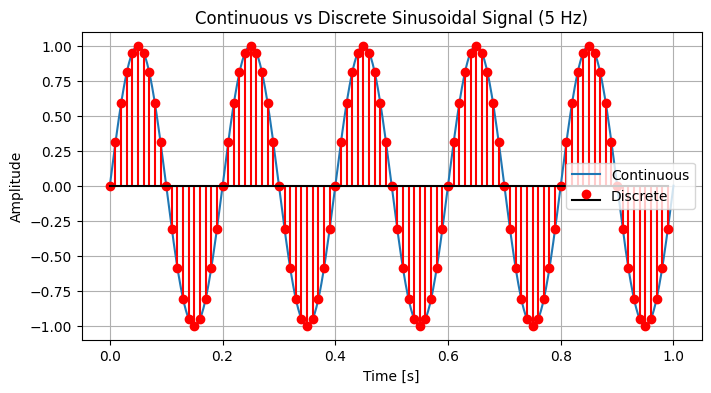

In [6]:
A, f, duration = 1, 5, 1
t_cont = np.linspace(0, duration, 1000)
t_disc = np.arange(0, duration, 0.01)  # discrete points

x_cont = A * np.sin(2 * np.pi * f * t_cont)
x_disc = A * np.sin(2 * np.pi * f * t_disc)

plt.figure(figsize=(8,4))
plt.plot(t_cont, x_cont, label="Continuous")
plt.stem(t_disc, x_disc, linefmt='r-', markerfmt='ro', basefmt='k', label="Discrete")
plt.title("Continuous vs Discrete Sinusoidal Signal (5 Hz)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


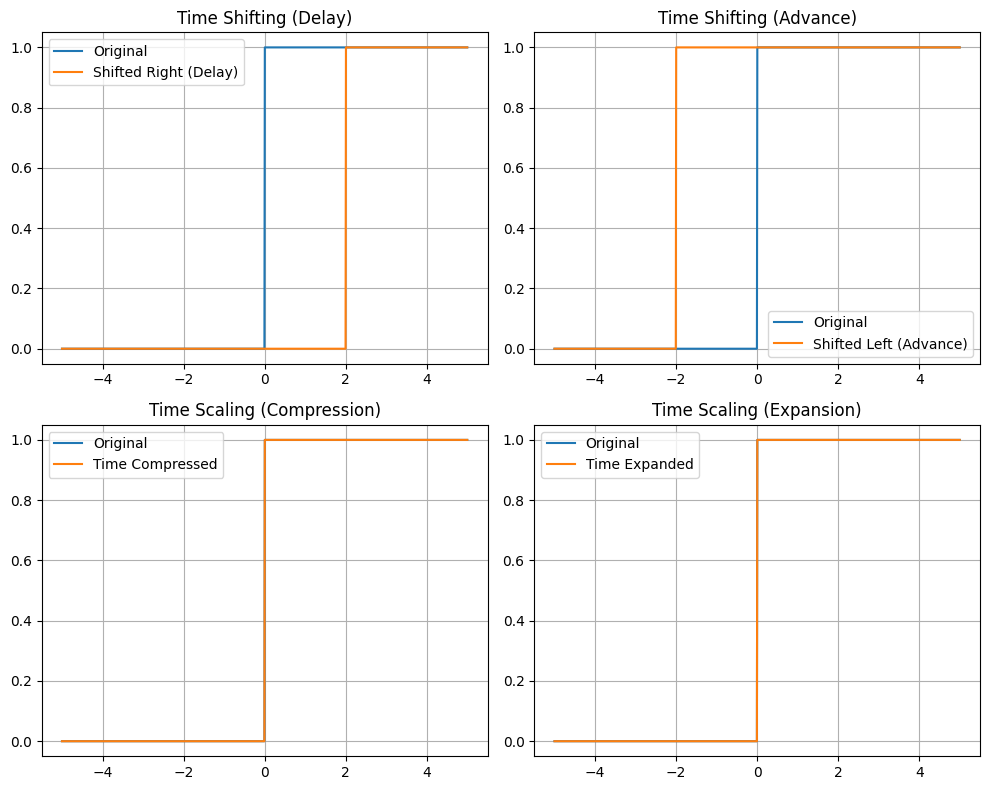

In [7]:
t = np.linspace(-5, 5, 1000)
x = np.heaviside(t, 1)

# Time shifting
x_shifted_right = np.heaviside(t - 2, 1)   # delayed
x_shifted_left  = np.heaviside(t + 2, 1)   # advanced

# Time scaling
x_compressed = np.heaviside(2*t, 1)
x_expanded = np.heaviside(0.5*t, 1)

# Plot
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(t, x, label='Original')
plt.plot(t, x_shifted_right, label='Shifted Right (Delay)')
plt.legend(); plt.grid(True); plt.title("Time Shifting (Delay)")

plt.subplot(2,2,2)
plt.plot(t, x, label='Original')
plt.plot(t, x_shifted_left, label='Shifted Left (Advance)')
plt.legend(); plt.grid(True); plt.title("Time Shifting (Advance)")

plt.subplot(2,2,3)
plt.plot(t, x, label='Original')
plt.plot(t, x_compressed, label='Time Compressed')
plt.legend(); plt.grid(True); plt.title("Time Scaling (Compression)")

plt.subplot(2,2,4)
plt.plot(t, x, label='Original')
plt.plot(t, x_expanded, label='Time Expanded')
plt.legend(); plt.grid(True); plt.title("Time Scaling (Expansion)")
plt.tight_layout()
plt.show()


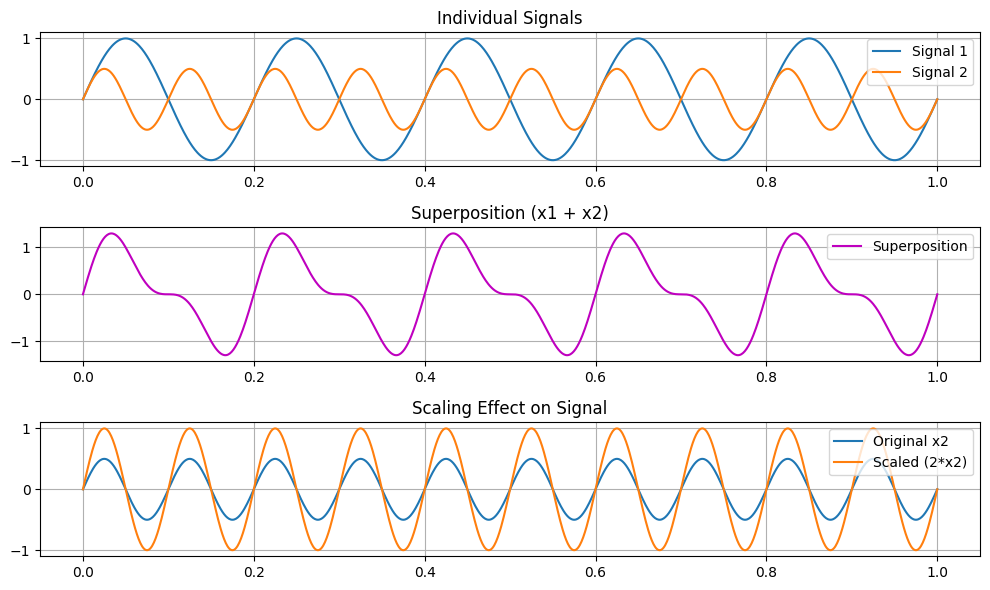

In [8]:
t = np.linspace(0, 1, 1000)
f1, A1 = 5, 1
f2, A2 = 10, 0.5

x1 = A1 * np.sin(2 * np.pi * f1 * t)
x2 = A2 * np.sin(2 * np.pi * f2 * t)
x_sum = x1 + x2
x_scaled = 2 * x2  # scaling

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t, x1, label='Signal 1')
plt.plot(t, x2, label='Signal 2')
plt.legend(); plt.grid(True); plt.title("Individual Signals")

plt.subplot(3,1,2)
plt.plot(t, x_sum, 'm', label='Superposition')
plt.legend(); plt.grid(True); plt.title("Superposition (x1 + x2)")

plt.subplot(3,1,3)
plt.plot(t, x2, label='Original x2')
plt.plot(t, x_scaled, label='Scaled (2*x2)')
plt.legend(); plt.grid(True); plt.title("Scaling Effect on Signal")
plt.tight_layout()
plt.show()


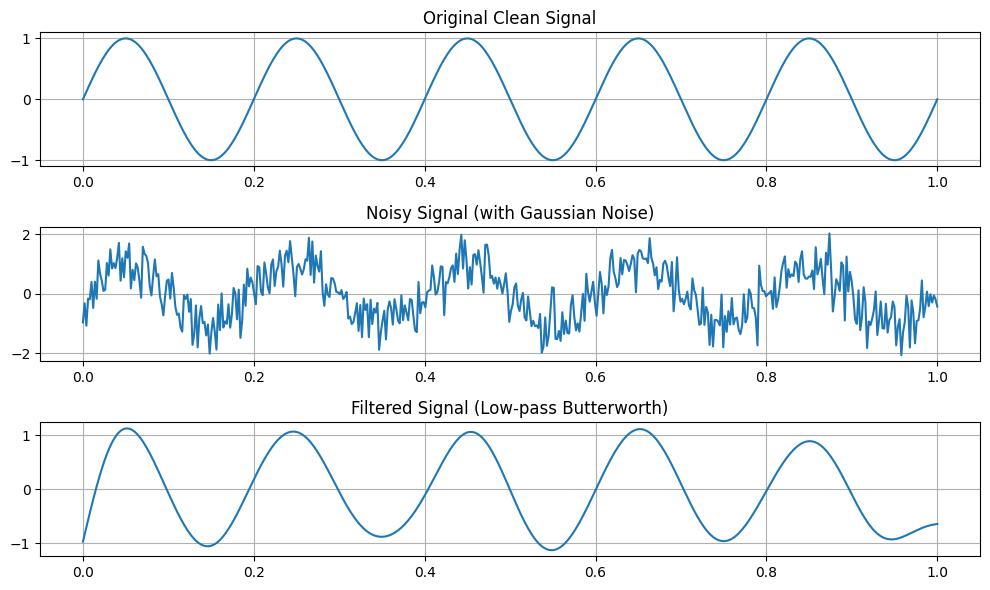

In [9]:
fs = 500
t = np.linspace(0, 1, fs)
f = 5
x_clean = np.sin(2 * np.pi * f * t)

# Add Gaussian noise
noise = np.random.normal(0, 0.5, len(t))
x_noisy = x_clean + noise

# Low-pass filter (Butterworth)
def low_pass_filter(signal, cutoff, fs, order=5):
    b, a = butter(order, cutoff / (fs/2), btype='low', analog=False)
    return filtfilt(b, a, signal)

x_filtered = low_pass_filter(x_noisy, cutoff=10, fs=fs)

# Plot
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t, x_clean)
plt.title("Original Clean Signal"); plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, x_noisy)
plt.title("Noisy Signal (with Gaussian Noise)"); plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, x_filtered)
plt.title("Filtered Signal (Low-pass Butterworth)"); plt.grid(True)
plt.tight_layout()
plt.show()
